1. 算法
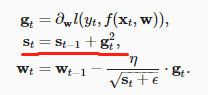
常规的Mini-batch随机梯度下降：
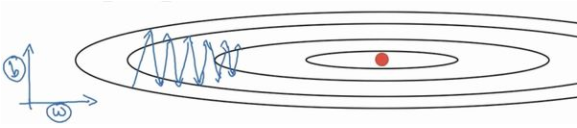
AdaGrad梯度下降：
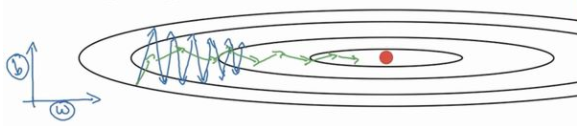

2. 从零简单实现
3. 简洁版实现



epoch 20, x1: -2.382563, x2: -0.158591


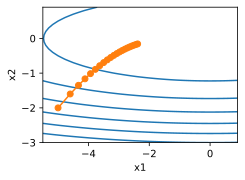

In [10]:
%matplotlib inline
import math
import torch
import dltools

def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
dltools.show_trace_2d(f_2d, dltools.train_2d(adagrad_2d))

epoch 20, x1: -0.002295, x2: -0.000000


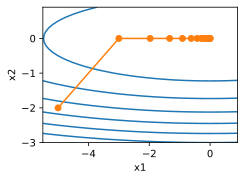

In [11]:
eta = 2
dltools.show_trace_2d(f_2d, dltools.train_2d(adagrad_2d))

In [12]:
# 手动实现
def init_adagrad_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] += torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

loss: 0.243, 0.032 sec/epoch


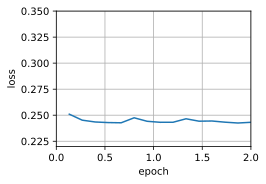

In [13]:
data_iter, feature_dim = dltools.get_data_ch11(batch_size=10)
dltools.train_ch11(adagrad, init_adagrad_states(feature_dim),{'lr': 0.1}, data_iter, feature_dim);

loss: 0.244, 0.032 sec/epoch


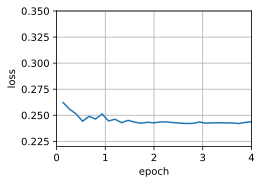

In [14]:
trainer = torch.optim.Adagrad
dltools.train_concise_ch11(trainer, {'lr': 0.1}, data_iter)